In [1]:
import string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
nltk.download('punkt')
nltk.download('stopwords')
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maype\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maype\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:


df = pd.read_csv(
    'ReutersGrain-train.csv', 
    sep=',',                 # Define o delimitador de campo como vírgula
    quotechar="'",           # Define aspas simples como o caractere de citação
    quoting=1,               # Configura para citar todos os campos (csv.QUOTE_ALL)
    escapechar='\\'          # Define barra invertida como o caractere de escape
)

# Exibir as primeiras linhas do df para verificação
print(df.head())


                                                Text  class-att
0  BAHIA COCOA REVIEW Showers continued throughou...          0
1  NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESER...          1
2  ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS ...          1
3  CHAMPION PRODUCTS &lt;CH> APPROVES STOCK SPLIT...          0
4  COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES ...          0


### Verificando a Quantidade de valores em nossa Classe Target

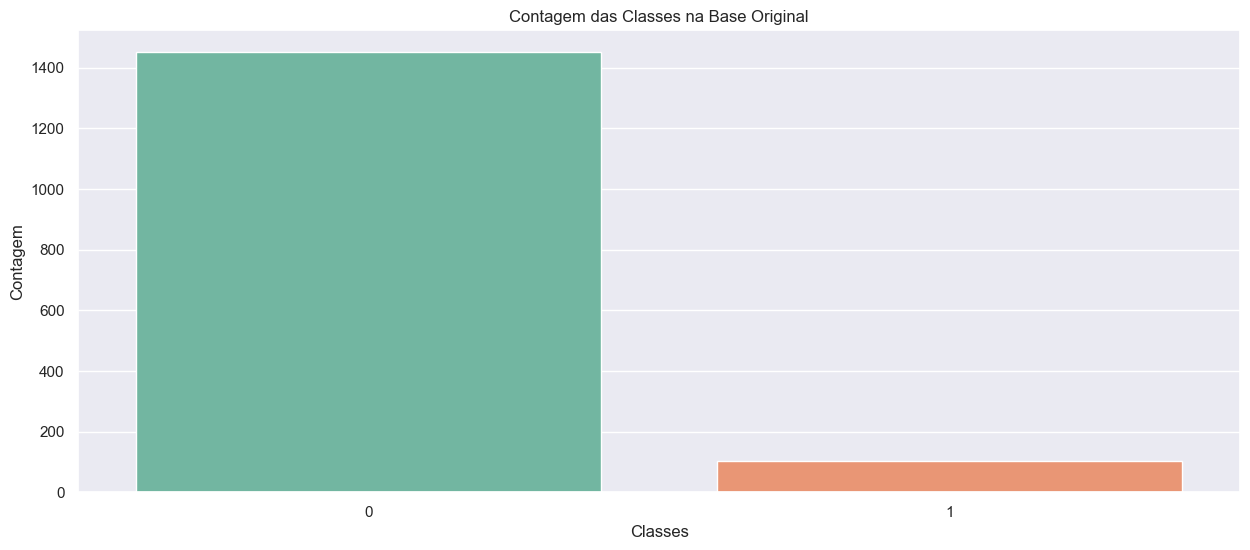

In [37]:
# Contagem das classes na base de dados original
contagem_classes_original = df['class-att'].value_counts()

# Plotando o gráfico de contagem para a base original
plt.figure(figsize=(15, 6))
sns.countplot(x='class-att', data=df, palette='Set2')
plt.title('Contagem das Classes na Base Original')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


### Importando e Carregando o Modelo `Spacy`

In [4]:
import spacy

# Carregar o modelo de linguagem em inglês
nlp = spacy.load('en_core_web_sm')

### Processamento de Texto

In [5]:
# Exemplo de texto real da base de dados
texto = """
'BAHIA COCOA REVIEW Showers continued throughout the week in
the Bahia cocoa zone, alleviating the drought since early
January and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
Comissaria Smith said in its weekly review.
    The dry period means the temporao will be late this year.
    Arrivals for the week ended February 22 were 155,221 bags
of 60 kilos making a cumulative total for the season of 5.93
mln against 5.81 at the same stage last year. Again it seems
that cocoa delivered earlier on consignment was included in the
arrivals figures.
    Comissaria Smith said there is still some doubt as to how
much old crop cocoa is still available as harvesting has
practically come to an end. With total Bahia crop estimates
around 6.4 mln bags and sales standing at almost 6.2 mln there
are a few hundred thousand bags still in the hands of farmers,
middlemen, exporters and processors.
    There are doubts as to how much of this cocoa would be fit
for export as shippers are now experiencing dificulties in
obtaining +Bahia superior+ certificates.
    In view of the lower quality over recent weeks farmers have
sold a good part of their cocoa held on consignment.
    Comissaria Smith said spot bean prices rose to 340 to 350
cruzados per arroba of 15 kilos.
    Bean shippers were reluctant to offer nearby shipment and
only limited sales were booked for March shipment at 1,750 to
1,780 dlrs per tonne to ports to be named.
    New crop sales were also light and all to open ports with
June/July going at 1,850 and 1,880 dlrs and at 35 and 45 dlrs
under New York july, Aug/Sept at 1,870, 1,875 and 1,880 dlrs
per tonne FOB.
    Routine sales of butter were made. March/April sold at
4,340, 4,345 and 4,350 dlrs.
    April/May butter went at 2.27 times New York May, June/July
at 4,400 and 4,415 dlrs, Aug/Sept at 4,351 to 4,450 dlrs and at
2.27 and 2.28 times New York Sept and Oct/Dec at 4,480 dlrs and
2.27 times New York Dec, Comissaria Smith said.
    Destinations were the U.S., Covertible currency areas,
Uruguay and open ports.
    Cake sales were registered at 785 to 995 dlrs for
March/April, 785 dlrs for May, 753 dlrs for Aug and 0.39 times
New York Dec for Oct/Dec.
    Buyers were the U.S., Argentina, Uruguay and convertible
currency areas.
    Liquor sales were limited with March/April selling at 2,325
and 2,380 dlrs, June/July at 2,375 dlrs and at 1.25 times New
York July, Aug/Sept at 2,400 dlrs and at 1.25 times New York
Sept and Oct/Dec at 1.25 times New York Dec, Comissaria Smith
said.
    Total Bahia sales are currently estimated at 6.13 mln bags
against the 1986/87 crop and 1.06 mln bags against the 1987/88
crop.
    Final figures for the period to February 28 are expected to
be published by the Brazilian Cocoa Trade Commission after
carnival which ends midday on February 27.
 Reuter
"""

In [6]:
# Processar o texto
doc = nlp(texto)

In [7]:
# Interando sobre as entidades identificadas na frase
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

REVIEW Showers ORG
the week DATE
Bahia PERSON
early
January DATE
Comissaria Smith PERSON
weekly DATE
late this year DATE
the week ended February 22 DATE
155,221 CARDINAL
60 CARDINAL
the season DATE
5.93 CARDINAL
5.81 CARDINAL
last year DATE
Comissaria Smith PERSON
Bahia PERSON
6.4 CARDINAL
almost 6.2 CARDINAL
a few hundred thousand CARDINAL
Bahia PERSON
recent weeks DATE
Comissaria Smith PERSON
340 CARDINAL
350 CARDINAL
15 CARDINAL
March DATE
1,750 CARDINAL
1,780 CARDINAL
June/July DATE
1,850 CARDINAL
1,880 CARDINAL
35 CARDINAL
45 CARDINAL
New York GPE
july DATE
Aug/Sept ORG
1,870 CARDINAL
1,875 CARDINAL
1,880 CARDINAL
FOB ORG
March/April DATE
4,340 CARDINAL
4,345 CARDINAL
4,350 CARDINAL
April/May DATE
2.27 CARDINAL
New York GPE
May, June/July DATE
4,400 CARDINAL
4,415 CARDINAL
Aug/Sept ORG
4,351 CARDINAL
4,450 CARDINAL
2.27 CARDINAL
2.28 CARDINAL
New York Sept GPE
Oct/Dec ORG
4,480 CARDINAL
2.27 CARDINAL
New York Dec GPE
Comissaria Smith PERSON
U.S. GPE
Uruguay GPE
785 CARDINAL
995 CA

In [8]:
# Destacando visualmente as entidades da frase e seus tipos
spacy.displacy.render(doc, style='ent', jupyter=True)

In [9]:
# Visualização do Analisador de Dependência
spacy.displacy.render(doc, style='dep',jupyter=True)

### Tokenização

In [10]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)



 
 SPACE _SP dep 
 False False
' ' PUNCT `` punct ' False False
BAHIA BAHIA PROPN NNP meta XXXX True False
COCOA COCOA PROPN NNP compound XXXX True False
REVIEW REVIEW PROPN NNP compound XXXX True False
Showers Showers PROPN NNPS nsubj Xxxxx True False
continued continue VERB VBD ccomp xxxx True False
throughout throughout ADP IN prep xxxx True True
the the DET DT det xxx True True
week week NOUN NN pobj xxxx True False
in in ADP IN prep xx True True

 
 SPACE _SP dep 
 False False
the the DET DT det xxx True True
Bahia Bahia PROPN NNP compound Xxxxx True False
cocoa cocoa NOUN NN compound xxxx True False
zone zone NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
alleviating alleviate VERB VBG advcl xxxx True False
the the DET DT det xxx True True
drought drought NOUN NN dobj xxxx True False
since since SCONJ IN prep xxxx True True
early early ADJ JJ amod xxxx True False

 
 SPACE _SP dep 
 False False
January January PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx

### Extração de Entidades Nomeadas (NER)


In [11]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


REVIEW Showers 14 28 ORG
the week 50 58 DATE
Bahia 66 71 PERSON
early
January 114 127 DATE
Comissaria Smith 233 249 PERSON
weekly 262 268 DATE
late this year 323 337 DATE
the week ended February 22 356 382 DATE
155,221 388 395 CARDINAL
60 404 406 CARDINAL
the season 443 453 DATE
5.93 457 461 CARDINAL
5.81 474 478 CARDINAL
last year 497 506 DATE
Comissaria Smith 609 625 PERSON
Bahia 763 768 PERSON
6.4 791 794 CARDINAL
almost 6.2 826 836 CARDINAL
a few hundred thousand 851 873 CARDINAL
Bahia 1080 1085 PERSON
recent weeks 1148 1160 DATE
Comissaria Smith 1231 1247 PERSON
340 1278 1281 CARDINAL
350 1285 1288 CARDINAL
15 1312 1314 CARDINAL
March 1419 1424 DATE
1,750 1437 1442 CARDINAL
1,780 1446 1451 CARDINAL
June/July 1551 1560 DATE
1,850 1570 1575 CARDINAL
1,880 1580 1585 CARDINAL
35 1598 1600 CARDINAL
45 1605 1607 CARDINAL
New York 1619 1627 GPE
july 1628 1632 DATE
Aug/Sept 1634 1642 ORG
1,870 1646 1651 CARDINAL
1,875 1653 1658 CARDINAL
1,880 1663 1668 CARDINAL
FOB 1684 1687 ORG
March/Apr

### Dependências Sintáticas

In [12]:
for token in doc:
    print(token.text, token.dep_, token.head.text, [child for child in token.children])



 dep ' []
' punct continued [
, BAHIA]
BAHIA meta ' []
COCOA compound REVIEW []
REVIEW compound Showers [COCOA]
Showers nsubj continued [REVIEW]
continued ccomp said [', Showers, throughout, in, ,, alleviating, ,]
throughout prep continued [week]
the det week []
week pobj throughout [the]
in prep continued [
, zone]

 dep in []
the det zone []
Bahia compound zone []
cocoa compound zone []
zone pobj in [the, Bahia, cocoa]
, punct continued []
alleviating advcl continued [drought, since, and, improving]
the det drought []
drought dobj alleviating [the]
since prep alleviating [January]
early amod January [
]

 dep early []
January pobj since [early]
and cc alleviating []
improving conj alleviating [prospects]
prospects dobj improving [for]
for prep prospects [temporao]
the det temporao []
coming amod temporao []
temporao pobj for [the, coming]
, punct continued [
]

 dep , []
although mark restored []
normal amod levels []
humidity compound levels []
levels nsubjpass restored [normal, hu

### Frases Nomeadas

In [13]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)


COCOA REVIEW Showers Showers nsubj continued
the week week pobj throughout
the Bahia cocoa zone zone pobj in
the drought drought dobj alleviating
early
January January pobj since
prospects prospects dobj improving
the coming temporao temporao pobj for
normal humidity levels levels nsubjpass restored
Comissaria Smith Smith nsubj said
its weekly review review pobj in
The dry period period nsubj means
the temporao temporao nsubj be
Arrivals Arrivals nsubj were
the week week pobj for
155,221 bags bags attr were
60 kilos kilos pobj of
a cumulative total total dobj making
the season season pobj for
5.93
mln mln pobj of
the same stage stage pobj at
it it nsubj seems
cocoa cocoa nsubjpass included
consignment consignment pobj on
the
arrivals figures figures pobj in
Comissaria Smith Smith nsubj said
some doubt doubt attr is
how
much old crop cocoa cocoa nsubj is
harvesting harvesting nsubj come
an end end pobj to
total Bahia crop crop nsubj estimates
around 6.4 mln bags bags dobj estimates
sale

### Construindo Modelo

In [14]:
# Separando o texto e suas classes 
texto = df["Text"].values
texto

array(['BAHIA COCOA REVIEW Showers continued throughout the week innthe Bahia cocoa zone, alleviating the drought since earlynJanuary and improving prospects for the coming temporao,nalthough normal humidity levels have not been restored,nComissaria Smith said in its weekly review.n    The dry period means the temporao will be late this year.n    Arrivals for the week ended February 22 were 155,221 bagsnof 60 kilos making a cumulative total for the season of 5.93nmln against 5.81 at the same stage last year. Again it seemsnthat cocoa delivered earlier on consignment was included in thenarrivals figures.n    Comissaria Smith said there is still some doubt as to hownmuch old crop cocoa is still available as harvesting hasnpractically come to an end. With total Bahia crop estimatesnaround 6.4 mln bags and sales standing at almost 6.2 mln therenare a few hundred thousand bags still in the hands of farmers,nmiddlemen, exporters and processors.n    There are doubts as to how much of this coc

In [15]:
classes = df["class-att"].values
classes 

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

### Treinando Modelo

In [16]:
# Definindo o vetorizador que irá converter os textos em vetores de contagens
vectorizer = CountVectorizer(analyzer="word")

# Transformando os textos em vetores de contagens de palavras
freq_texto = vectorizer.fit_transform(texto)

In [17]:
# Definindo o modelo de classificação Naive Bayes Multinomial
modelo = MultinomialNB()

# Treinando o modelo com os vetores de contagens e as classes correspondentes
modelo.fit(freq_texto, classes)

MultinomialNB()

In [18]:
# Definindo os hiperparâmetros que serão testados no GridSearchCV
parametros = {
    'alpha': [0.1, 0.5, 1.0],  # Valores para o parâmetro de suavização Laplaciana
    'fit_prior': [True, False]  # Se deve estimar as probabilidades a priori das classes
}

In [19]:
# Criando o objeto GridSearchCV com o modelo, os hiperparâmetros e a estratégia de validação cruzada
grid_search = GridSearchCV(modelo, parametros, cv=5)

# Ajustando o GridSearchCV aos dados
grid_search.fit(freq_texto, classes)

# Obtendo os melhores parâmetros encontrados pelo GridSearchCV
melhores_parametros = grid_search.best_params_

print(melhores_parametros)

{'alpha': 1.0, 'fit_prior': True}


In [20]:
# Obtendo a melhor pontuação alcançada pelo GridSearchCV
melhor_pontuacao = grid_search.best_score_
print(melhor_pontuacao)

0.9774815890467794


### Testando o Modelo

In [21]:
testes = pd.read_csv(
    'ReutersGrain-test.csv', 
    sep=',',                 # Define o delimitador de campo como vírgula
    quotechar="'",           # Define aspas simples como o caractere de citação
    quoting=1,               # Configura para citar todos os campos (csv.QUOTE_ALL)
    escapechar='\\'          # Define barra invertida como o caractere de escape
)


freq_testes = vectorizer.transform(testes)
modelo.predict(freq_testes)

array([0, 0], dtype=int64)

### Avaliando o Modelo

In [22]:
# Validação cruzada do modelo. Neste caso, o modelo é dividido em 10 partes, treinado em 9 e testado em 1
resultados = cross_val_predict(modelo, freq_texto, classes, cv = 10)
resultados

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
# Acurácia do Modelo
metrics.accuracy_score(classes, resultados)

0.9787644787644788

In [24]:
# Medidas de validação do modelo
rotulos = ["Classe 0", "Classe 1"]
print(metrics.classification_report(classes, resultados, target_names=rotulos))

# Lembrando que:
#    : precision = true positive / (true positive + false positive)
#    : recall    = true positive / (true positive + false negative)
#    : f1-score  = 2 * ((precision * recall) / (precision + recall))


              precision    recall  f1-score   support

    Classe 0       0.99      0.99      0.99      1451
    Classe 1       0.86      0.81      0.83       103

    accuracy                           0.98      1554
   macro avg       0.93      0.90      0.91      1554
weighted avg       0.98      0.98      0.98      1554



In [25]:
# matriz de confusão
conf_matrix = pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True)
print(conf_matrix)
# Lembrando que:
#    - Predito = O que o programa classificou como 1, 0  e All
#    - Real    = O que é de fato 1, 0 e All
#
""" O modelo classificou 13 instâncias que pertenciam a classe 0 como classe 1.
    Para as instâncias da classe 1, foram classificadas 20 instâncias como classe 0"""

Predito     0   1   All
Real                   
0        1438  13  1451
1          20  83   103
All      1458  96  1554


' O modelo classificou 13 instâncias que pertenciam a classe 0 como classe 1.\n    Para as instâncias da classe 1, foram classificadas 20 instâncias como classe 0'

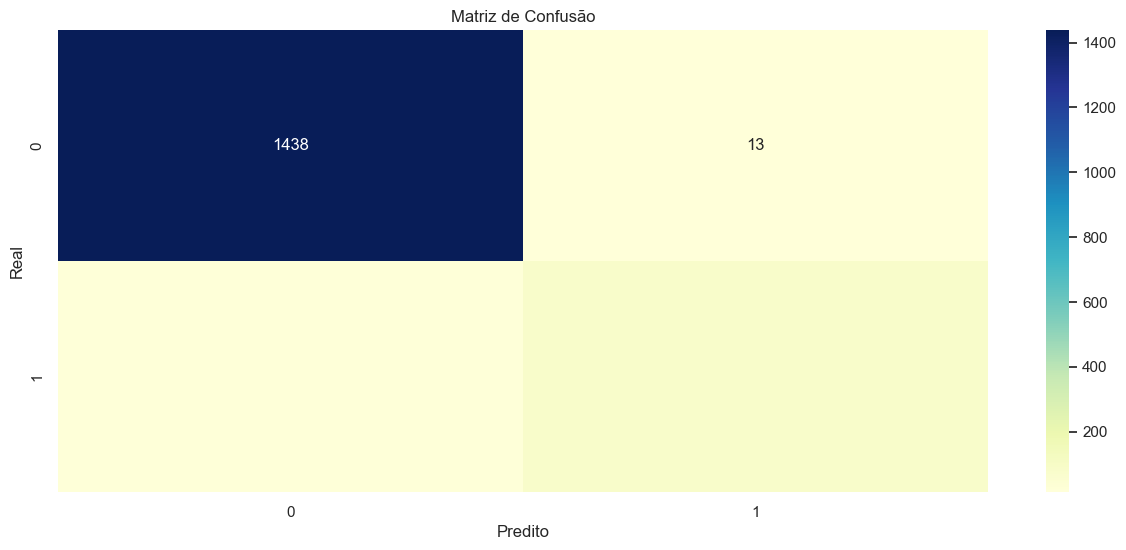

In [39]:
# Criando o heatmap
cf_matrix = conf_matrix.iloc[:-1, :-1]  # Remove a última linha e última coluna

# Plota o mapa de calor da matriz de confusão
plt.figure(figsize=(15, 6))
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Matriz de Confusão')
plt.show()

# Avaliando modelo com a base Balanceada 

In [27]:
# Importando bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler

In [28]:
# Balanceamento da base de dados com undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(freq_texto, classes)

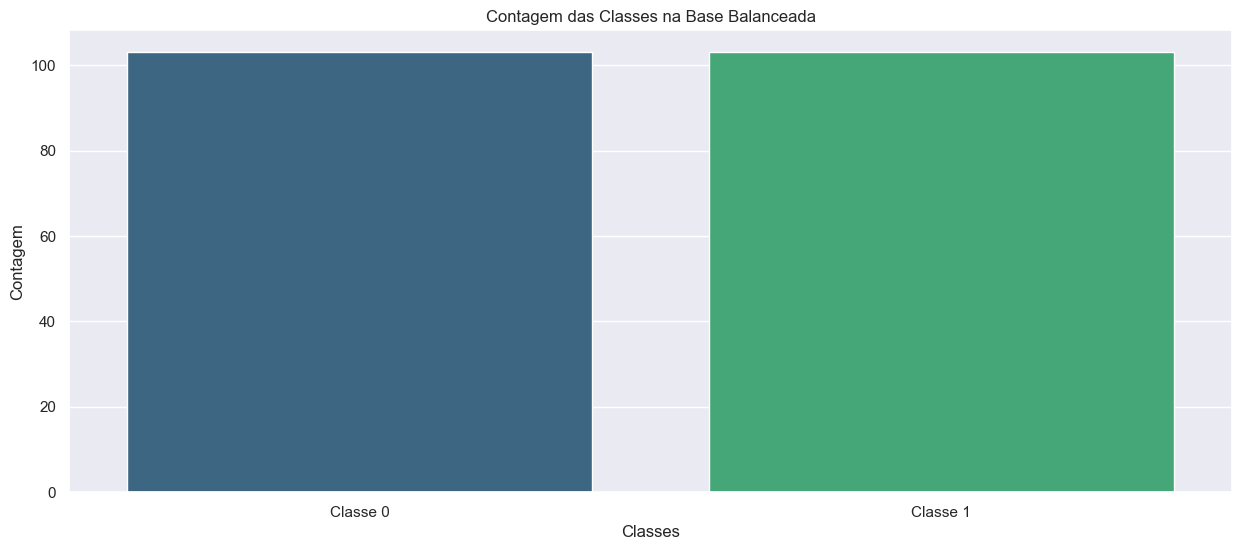

In [40]:
# Contagem das classes na base de dados balanceada
contagem_classes_balanceada = pd.Series(y_resampled).value_counts()

# Plotando o gráfico de contagem para a base balanceada
plt.figure(figsize=(15, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Contagem das Classes na Base Balanceada')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=rotulos)
plt.show()

In [30]:
# Definindo o modelo de classificação Naive Bayes Multinomial
modelo_balanceado = MultinomialNB()

# Treinando o modelo balanceado com os vetores de contagens e as classes correspondentes
modelo_balanceado.fit(X_resampled, y_resampled)


MultinomialNB()

In [31]:
# Validação cruzada do modelo balanceado
resultados_balanceados = cross_val_predict(modelo_balanceado, X_resampled, y_resampled, cv=10)

# Acurácia do Modelo Balanceado
acuracia_balanceada = metrics.accuracy_score(y_resampled, resultados_balanceados)
print("Acurácia do Modelo Balanceado:", acuracia_balanceada)

# Medidas de validação do modelo balanceado
print(metrics.classification_report(y_resampled, resultados_balanceados, target_names=rotulos))


Acurácia do Modelo Balanceado: 0.9223300970873787
              precision    recall  f1-score   support

    Classe 0       1.00      0.84      0.92       103
    Classe 1       0.87      1.00      0.93       103

    accuracy                           0.92       206
   macro avg       0.93      0.92      0.92       206
weighted avg       0.93      0.92      0.92       206



In [32]:
# matriz de confusão
conf_matrix_balanceada = pd.crosstab(y_resampled, resultados_balanceados, rownames=["Real"], colnames=["Predito"], margins=True)
print(conf_matrix_balanceada)
# Lembrando que:
#    - Predito = O que o programa classificou como 1, 0  e All
#    - Real    = O que é de fato 1, 0 e All
#
""" O modelo classificou 16 instâncias que pertenciam a classe 0 como classe 1.
    Para as instâncias da classe 1, foram classificadas 0 instâncias como classe 0"""

Predito   0    1  All
Real                 
0        87   16  103
1         0  103  103
All      87  119  206


' O modelo classificou 16 instâncias que pertenciam a classe 0 como classe 1.\n    Para as instâncias da classe 1, foram classificadas 0 instâncias como classe 0'

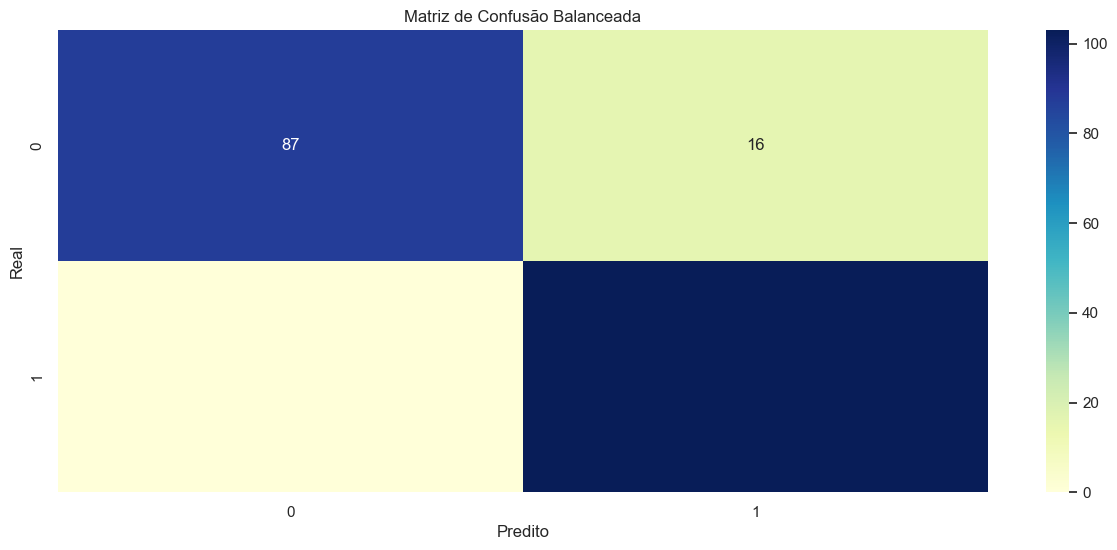

In [42]:
# Matriz de confusão balanceada
conf_matrix_balanceada = pd.crosstab(y_resampled, resultados_balanceados, rownames=["Real"], colnames=["Predito"], margins=True)

# Criando o heatmap para a matriz de confusão balanceada
cf_matrix_balanceada = conf_matrix_balanceada.iloc[:-1, :-1]  # Remove a última linha e última coluna

plt.figure(figsize=(15, 6))
sns.heatmap(cf_matrix_balanceada, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Matriz de Confusão Balanceada')
plt.show()